In [2]:
import numpy as np

###  4.2.1 평균제곱오차

In [4]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

### 4.2.2 교차엔트로피

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

### 4.2.3 미치배치

In [11]:
import sys, os
os.chdir("../Deep learning from scratch/dataset")

In [15]:
import numpy as np
from mnist import load_mnist

(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, flatten=True, one_hot_label=True)
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [16]:
train_size = x_train.shape[0]
batch_size = 10

# 전체 60000개의 데이터중에서 무작위 10개 데이터만 가지고 온다.
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]

In [17]:
np.random.choice(60000, 10)

array([32650, 31395, 43179, 30484,  1986,   414,  7188, 36973, 29314,
       51217])

### 4.2.4 교차 엔트로피 오차 구하기

In [19]:
# ndim : 배열의 차원수를 나타낸다.
# size : 원소의 개수

# y의 입력값으로 one_hot_encoding이 적용된 경우
def cross_enrtopy_error(y, t):
    if y.ndim == 1: # 데이터가 하나인 경우
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size


# one_hot_encoding이 적용 안된경우
def cross_entropy_error2(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(y[np.arange(batch_size), t] + 1e-7) / batch_size

### 4.3.1 미분 - 중앙차분방식

In [35]:
# h를 가급적 작은 값을 넣기 위해 10e-50을 사용하게 되면 반올림 오차문제를 발생시키게 된다.
# 따라서 1e-4가 가장 적합하고 좋은 결과를 얻는다고 한다.
# 위의 문제점을 해결하면 다음과같이 중앙차분방식으로 정의

def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

### 4.3.2 수치미분

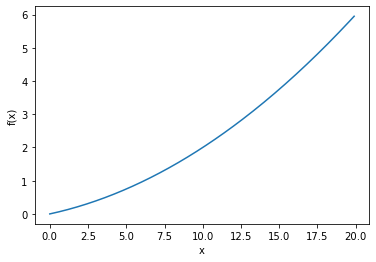

In [3]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [5]:
# x에 해당값들이 들어갔을 떄의 미분값

result = numerical_diff(function_1, 5)
print(result)
result = numerical_diff(function_1, 10)
print(result)

0.1999999999990898
0.2999999999986347


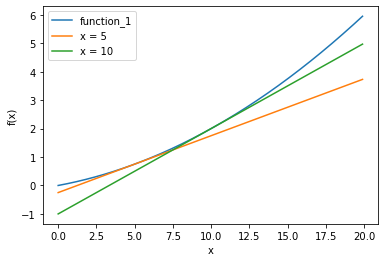

In [36]:
def function_2(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d * x
    return lambda t: d*t + y

tf = function_2(function_1, 5)
y2 = tf(x)

tf2 = function_2(function_1, 10)
y3 = tf2(x)
plt.plot(x, y, x, y2, x, y3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(["function_1", "x = 5", "x = 10"])